In [1]:
import pickle
from scipy import sparse
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import spektral
import os
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras_tuner as kt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import openpyxl

In [640]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\Data Analysis.xlsx")
RTD500 =pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\RTD(500).xlsx")
RTD300 =pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\RTD(300).xlsx")
A = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\A_det.xlsx")
A0 = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\Section 4.4.1_A0.xlsx")
batch_raw = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\batch.xlsx")

0      0.000000
1     -0.004548
2     -0.009096
3     -0.013645
4     -0.018193
         ...   
374   -1.701034
375   -1.705582
376   -1.710130
377   -1.714678
378   -1.719226
Name: t, Length: 379, dtype: float64


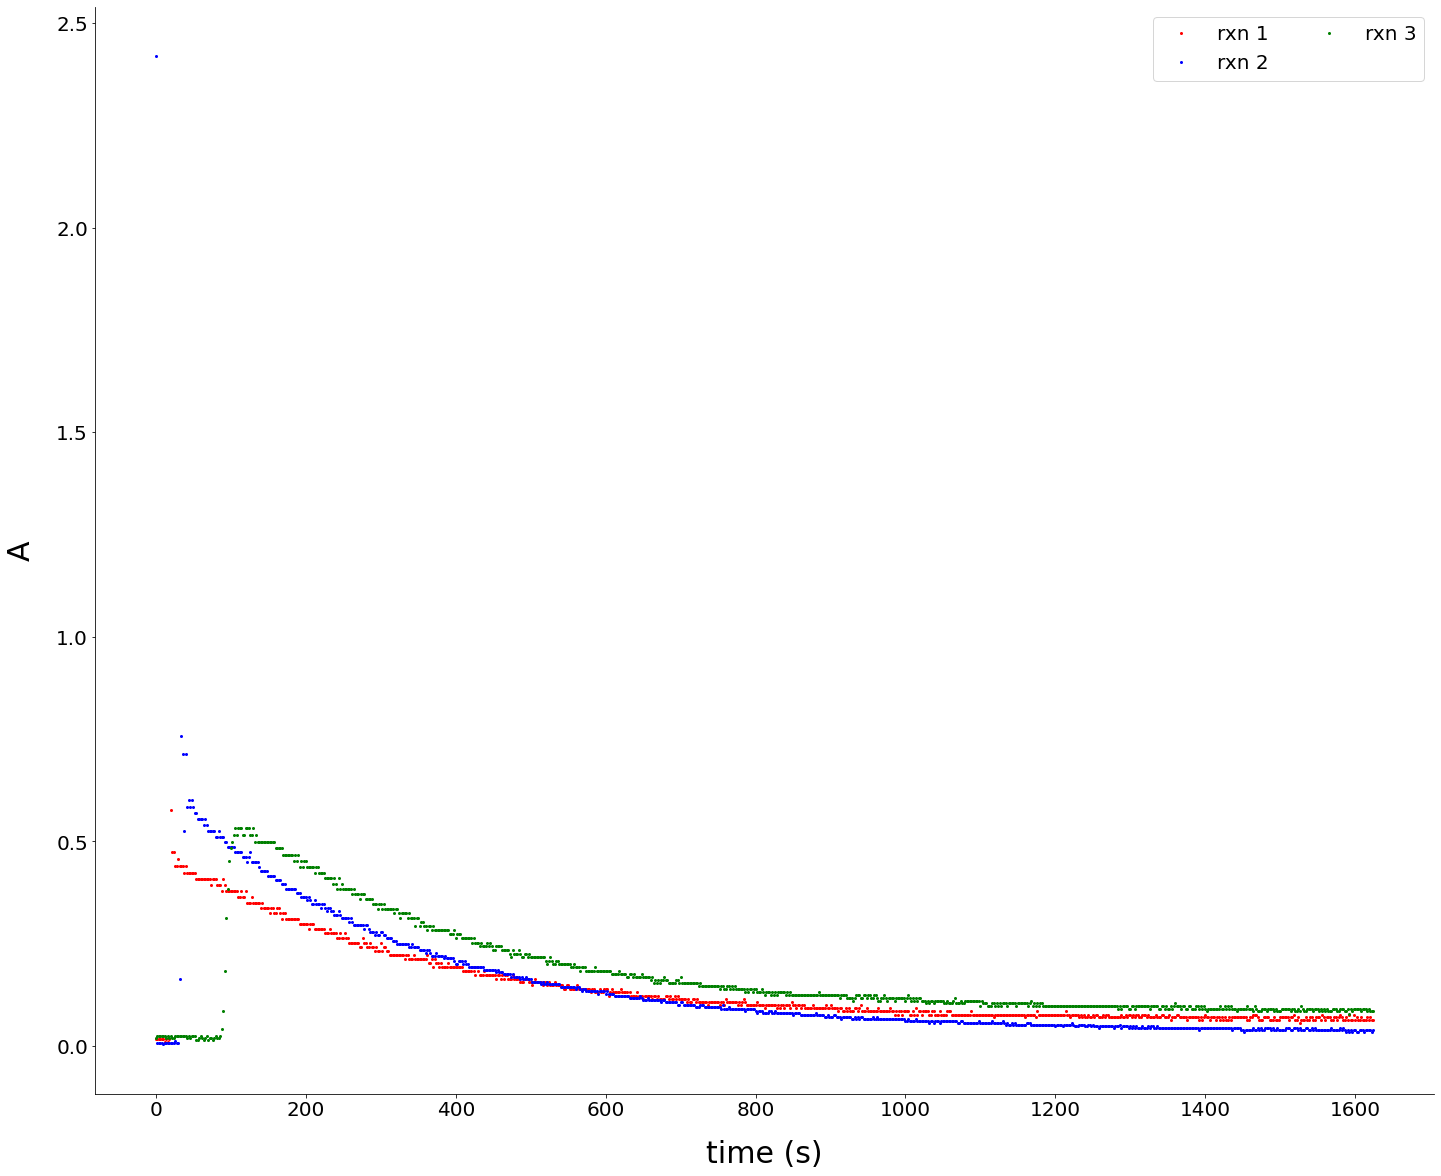

In [662]:
batch_raw = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\batch.xlsx")
fig = figure(figsize = (24,20))
t_int = batch_raw["t"]

n = 1
markersize = 2
plt.plot(t_int[::n],batch_raw["rxn 1"][::n],'ro', markersize = markersize, label = "rxn 1") #1
plt.plot(t_int[::n],batch_raw["rxn 2"][::n],'bo',markersize = markersize, label = "rxn 2") #2
plt.plot(t_int[::n],batch_raw["rxn 3"][::n],'go',markersize = markersize, label = "rxn 3") #3



#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
print(np.log(np.exp(-k1*batch["t"])))
plt.ylabel(r"A", fontsize = 30,labelpad=20)
plt.xlabel(r"time (s)",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

0      0.000000
1     -0.004548
2     -0.009096
3     -0.013645
4     -0.018193
         ...   
374   -1.701034
375   -1.705582
376   -1.710130
377   -1.714678
378   -1.719226
Name: t, Length: 379, dtype: float64


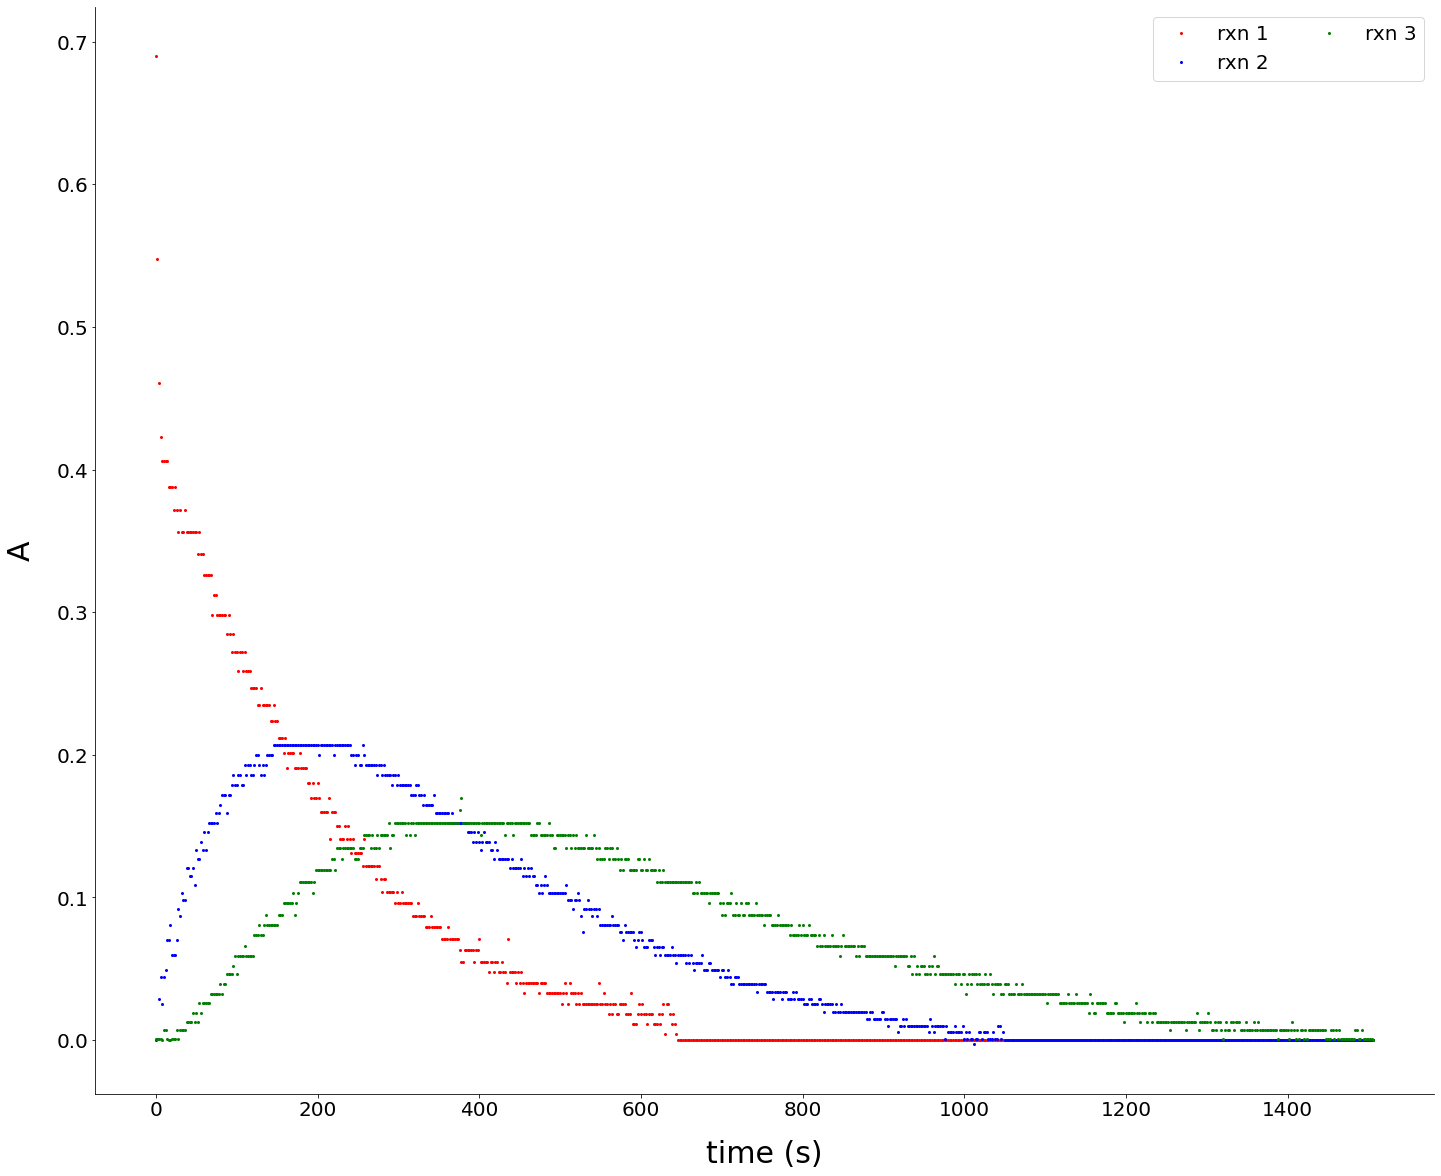

In [667]:
RTD500_raw = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\RTD(500).xlsx")
fig = figure(figsize = (24,20))
t_int = RTD500_raw["t"]

n = 1
markersize = 2
plt.plot(t_int[::n],RTD500_raw["A (rxtr 1)"][::n],'ro', markersize = markersize, label = "rxn 1") #1
plt.plot(t_int[::n],RTD500_raw["A (rxtr 2)"][::n],'bo',markersize = markersize, label = "rxn 2") #2
plt.plot(t_int[::n],RTD500_raw["A (rxtr 3)"][::n],'go',markersize = markersize, label = "rxn 3") #3



#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
print(np.log(np.exp(-k1*batch["t"])))
plt.ylabel(r"A", fontsize = 30,labelpad=20)
plt.xlabel(r"time (s)",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

0      0.000000
1     -0.004548
2     -0.009096
3     -0.013645
4     -0.018193
         ...   
374   -1.701034
375   -1.705582
376   -1.710130
377   -1.714678
378   -1.719226
Name: t, Length: 379, dtype: float64


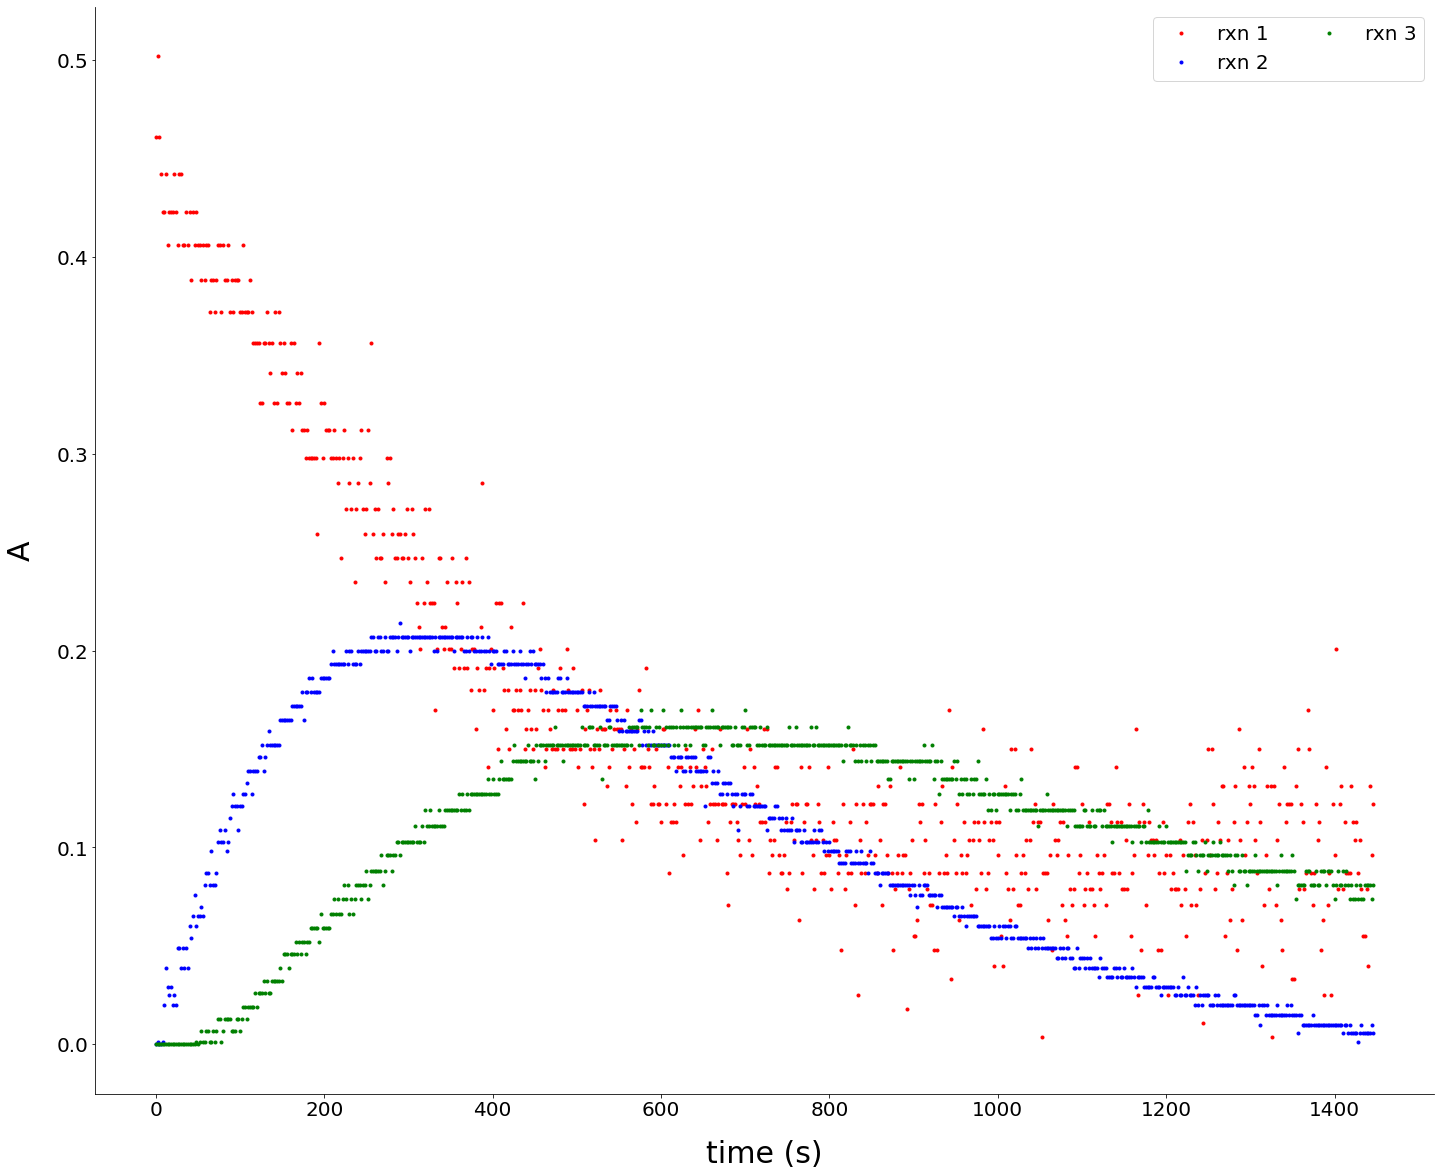

In [669]:
RTD500_raw = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\RTD(300).xlsx")
fig = figure(figsize = (24,20))
t_int = RTD500_raw["t"]

n = 1
markersize = 3
plt.plot(t_int[::n],RTD500_raw["A (rxtr 1)"][::n],'ro', markersize = markersize, label = "rxn 1") #1
plt.plot(t_int[::n],RTD500_raw["A (rxtr 2)"][::n],'bo',markersize = markersize, label = "rxn 2") #2
plt.plot(t_int[::n],RTD500_raw["A (rxtr 3)"][::n],'go',markersize = markersize, label = "rxn 3") #3



#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
print(np.log(np.exp(-k1*batch["t"])))
plt.ylabel(r"A", fontsize = 30,labelpad=20)
plt.xlabel(r"time (s)",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

0          0
1          1
2          2
3          3
4          4
        ... 
1073    1073
1074    1074
1075    1075
1076    1076
1077    1077
Name: t1, Length: 1078, dtype: int64


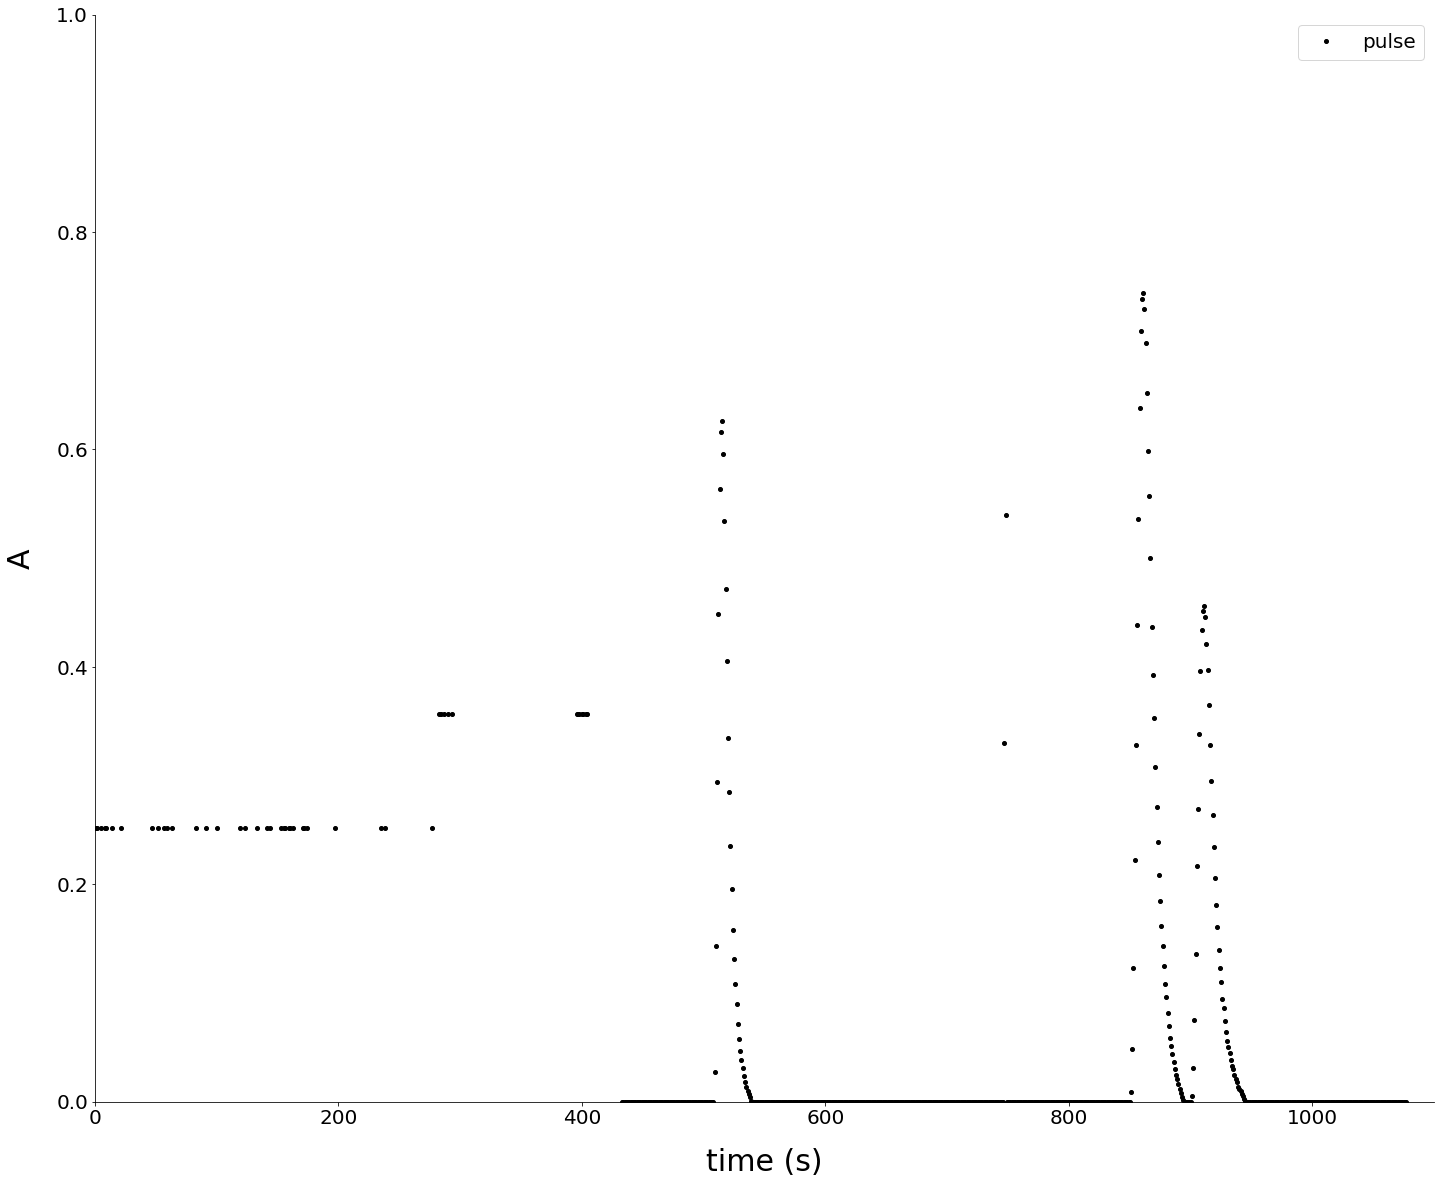

In [685]:
RTD500_raw = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\PFR_dat.xlsx")
fig = figure(figsize = (24,20))
t_int = RTD500_raw["t1"]

n = 1
markersize = 4
#plt.plot(t_int[::n],RTD500_raw["rxn 1"][::n],'ro', markersize = markersize, label = "rxn 1") #1
#plt.plot(t_int[::n],RTD500_raw["rxn 2"][::n],'bo',markersize = markersize, label = "rxn 2") #2
#plt.plot(t_int[::n],RTD500_raw["rxn 3"][::n],'go',markersize = markersize, label = "rxn 3") #3
plt.plot(t_int[::n],RTD500_raw["last"][::n],'ko',markersize = markersize, label = "pulse")


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")
plt.ylim(0,1)
plt.xlim(0,1100)
legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
plt.ylabel(r"A", fontsize = 30,labelpad=20)
plt.xlabel(r"time (s)",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
print(t_int)

0         0
1         1
2         2
3         3
4         4
       ... 
2474    445
2475    446
2476    447
2477    448
2478    449
Name: s, Length: 2479, dtype: int64


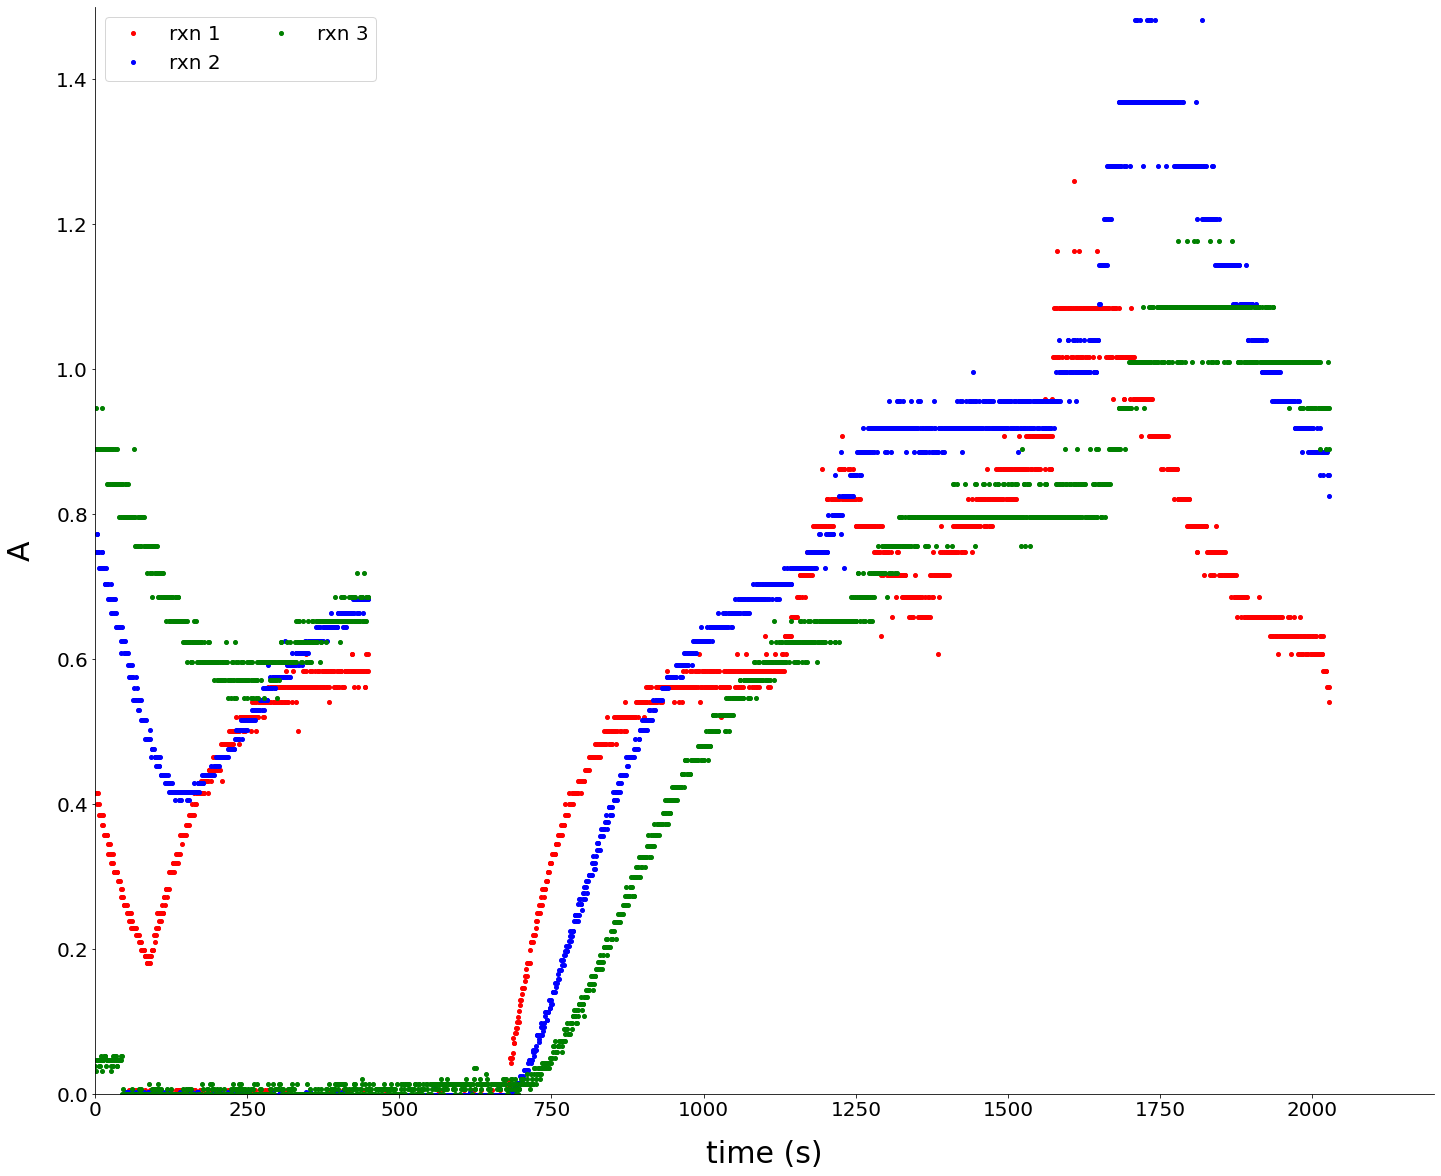

In [691]:
RTD500_raw = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\Section 4.4.1_A0.xlsx")
fig = figure(figsize = (24,20))
t_int = RTD500_raw["s"]

n = 1
markersize = 4
plt.plot(t_int[::n],RTD500_raw["A (rxtr 1)"][::n],'ro', markersize = markersize, label = "rxn 1") #1
plt.plot(t_int[::n],RTD500_raw["A (rxtr 2)"][::n],'bo',markersize = markersize, label = "rxn 2") #2
plt.plot(t_int[::n],RTD500_raw["A (rxtr 3)"][::n],'go',markersize = markersize, label = "rxn 3") #3
#plt.plot(t_int[::n],RTD500_raw["last"][::n],'ko',markersize = markersize, label = "pulse")


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")
plt.ylim(0,1.5)
plt.xlim(0,2200)
legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
plt.ylabel(r"A", fontsize = 30,labelpad=20)
plt.xlabel(r"time (s)",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
print(t_int)

0          0
1          1
2          2
3          3
4          4
        ... 
1730    1730
1731    1731
1732    1732
1733    1733
1734    1734
Name: s, Length: 1735, dtype: int64


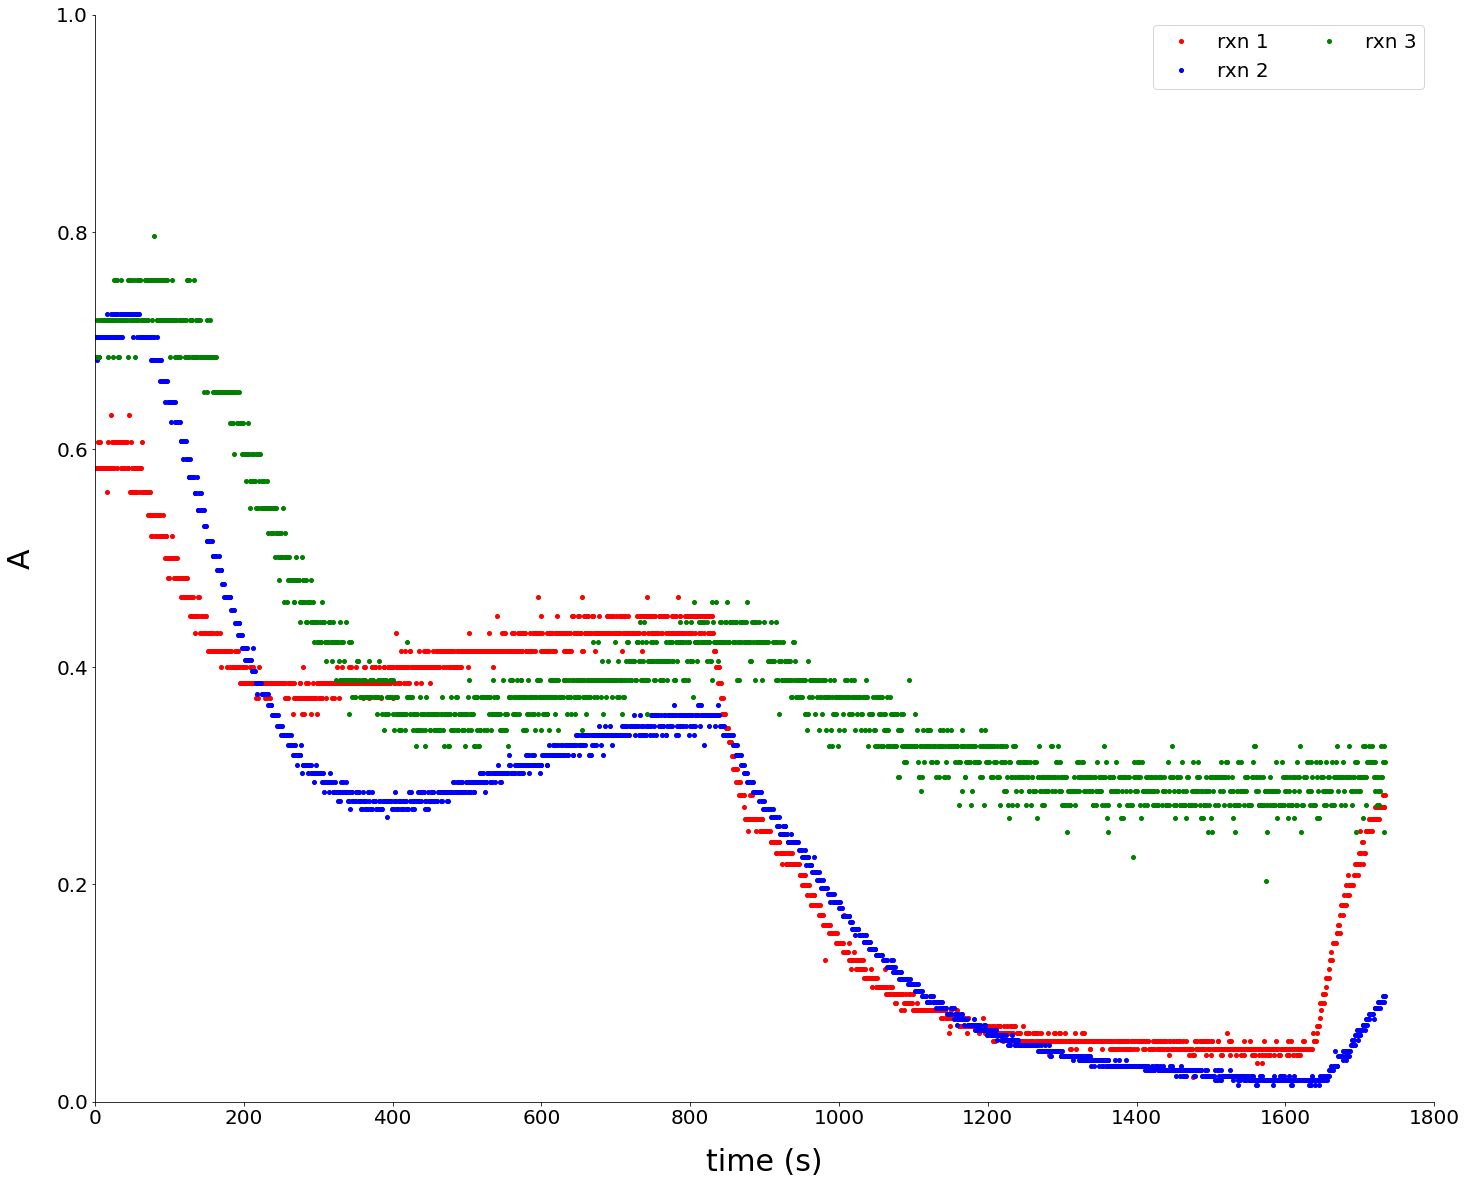

In [693]:
RTD500_raw = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\A_det.xlsx")
fig = figure(figsize = (24,20))
t_int = RTD500_raw["s"]

n = 1
markersize = 4
plt.plot(t_int[::n],RTD500_raw["A (rxtr 1)"][::n],'ro', markersize = markersize, label = "rxn 1") #1
plt.plot(t_int[::n],RTD500_raw["A (rxtr 2)"][::n],'bo',markersize = markersize, label = "rxn 2") #2
plt.plot(t_int[::n],RTD500_raw["A (rxtr 3)"][::n],'go',markersize = markersize, label = "rxn 3") #3
#plt.plot(t_int[::n],RTD500_raw["last"][::n],'ko',markersize = markersize, label = "pulse")


#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")
plt.ylim(0,1)
plt.xlim(0,1800)
legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
plt.ylabel(r"A", fontsize = 30,labelpad=20)
plt.xlabel(r"time (s)",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
print(t_int)

0      0.000000
1     -0.004548
2     -0.009096
3     -0.013645
4     -0.018193
         ...   
374   -1.701034
375   -1.705582
376   -1.710130
377   -1.714678
378   -1.719226
Name: t, Length: 379, dtype: float64


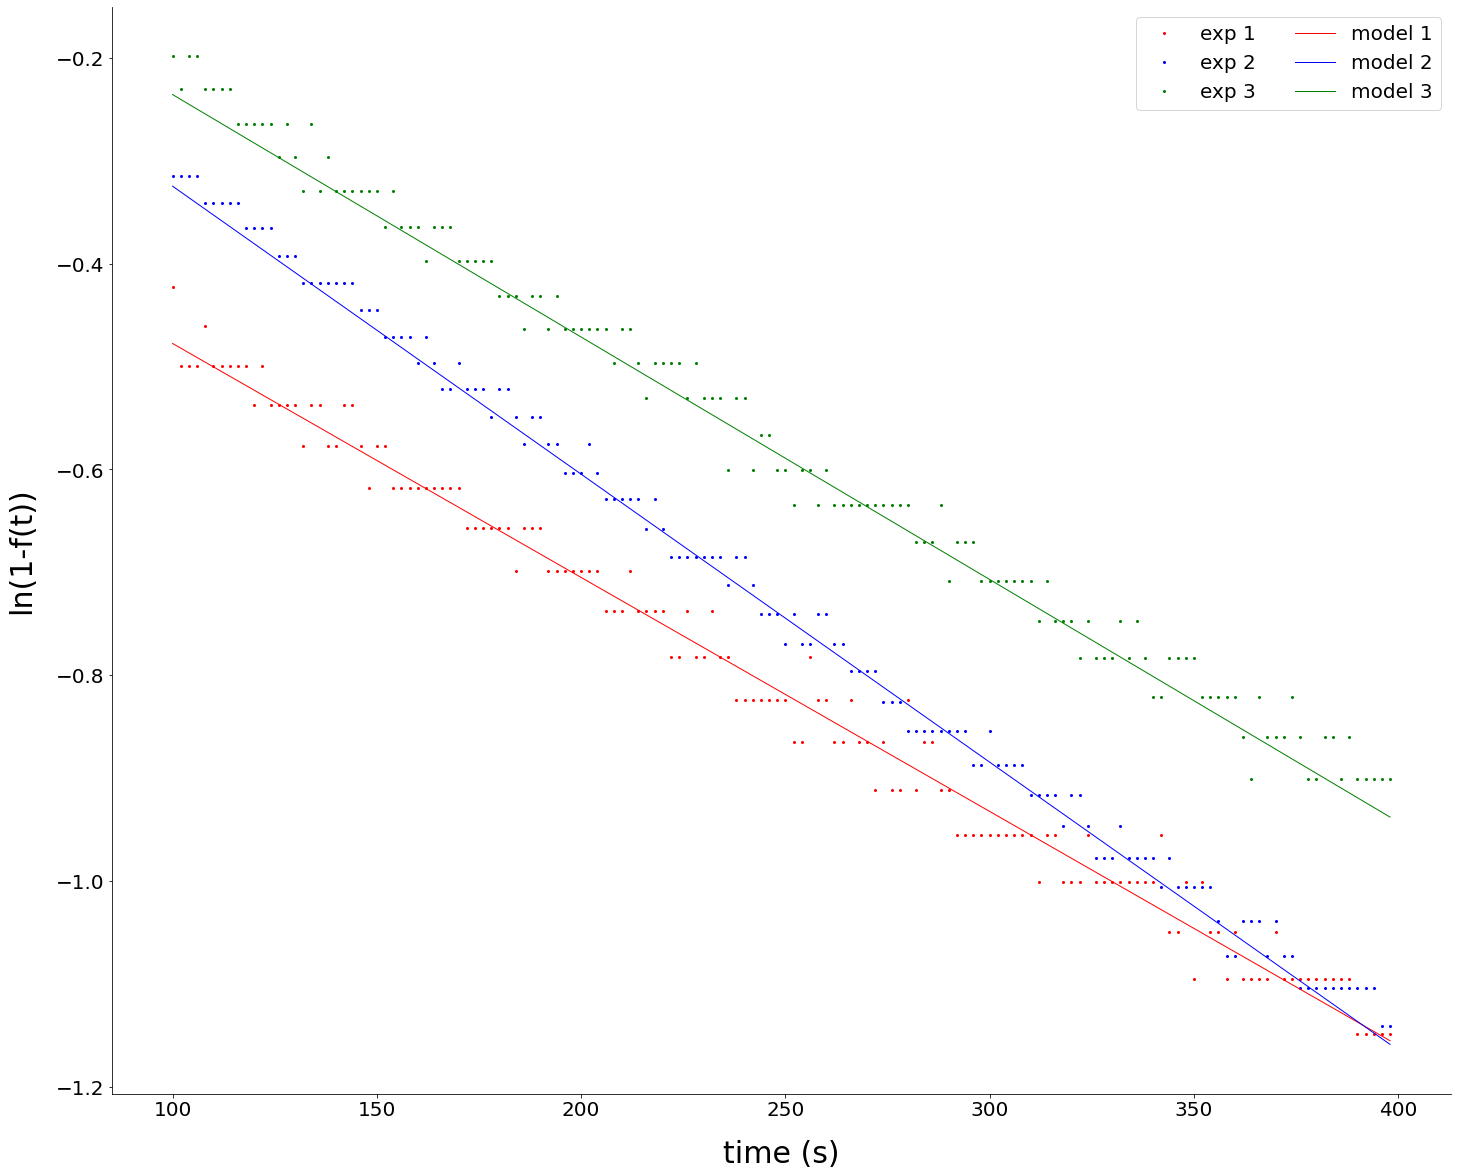

In [656]:
#batch plot and k_avg and k_err
fig = figure(figsize = (24,20))
t_int = batch["t"][50:200]

n = 1
markersize = 2
plt.plot(t_int[::n],batch["ln(A/Ao)"][50:200][::n],'ro', markersize = markersize, label = "exp 1") #1
plt.plot(t_int[::n],batch["ln(A/Ao).1"][50:200][::n],'bo',markersize = markersize, label = "exp 2") #2
plt.plot(t_int[::n],batch["ln(A/Ao).2"][50:200][::n],'go',markersize = markersize, label = "exp 3") #3


k1 =0.002274109
k2 =0.002799055
k3 =0.0023565

k_avg = 0.0024
k_err = 1.06 * np.power(1/10,-5)

f1 = np.log(np.exp(-k1*batch["t"][105:255]))
f2 = np.log(np.exp(-k2*batch["t"][58:208]))
f3 = np.log(np.exp(-k3*t_int))

plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
print(np.log(np.exp(-k1*batch["t"])))
plt.ylabel(r"ln(1-f(t))", fontsize = 30,labelpad=20)
plt.xlabel(r"time (s)",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

In [627]:
###### getting ca0
A0
A0_300 = A0[2029:-1]
A0_500 = A0[0:2029]

A0_rxn3_500 = A0_500["A (rxtr 3)"][1500:1560]#[1970:2020]
A0_rxn2_500 = A0_500["A (rxtr 2)"][1500:1560]#[1970:2020]
A0_rxn1_500 = A0_500["A (rxtr 1)"][1500:1560]#[1970:2020]

A0_rxn3_300 = A0_300["A (rxtr 3)"][1:25]
A0_rxn2_300 = A0_300["A (rxtr 2)"][1:25]
A0_rxn1_300 = A0_300["A (rxtr 1)"][300:400]


A0_rxn3_300_avg = np.average(A0_rxn3_300)
A0_rxn2_300_avg = np.average(A0_rxn2_300)
A0_rxn1_300_avg = np.average(A0_rxn1_300)

A0_rxn3_500_avg = np.average(A0_rxn3_500)
A0_rxn2_500_avg = np.average(A0_rxn2_500)
A0_rxn1_500_avg = np.average(A0_rxn1_500)

A0_rxn3_300_std = np.std(A0_rxn3_300)
A0_rxn2_300_std = np.std(A0_rxn2_300)
A0_rxn1_300_std = np.std(A0_rxn1_300)

A0_rxn3_500_std = np.std(A0_rxn3_500)
A0_rxn2_500_std = np.std(A0_rxn2_500)
A0_rxn1_500_std = np.std(A0_rxn1_500)

print(A0_rxn3_300)

2030    0.946
2031    0.890
2032    0.890
2033    0.890
2034    0.890
2035    0.890
2036    0.890
2037    0.890
2038    0.890
2039    0.890
2040    0.946
2041    0.890
2042    0.890
2043    0.890
2044    0.890
2045    0.890
2046    0.890
2047    0.890
2048    0.890
2049    0.841
2050    0.841
2051    0.890
2052    0.890
2053    0.841
Name: A (rxtr 3), dtype: float64


In [628]:
A_500 = A
A_300 = A

A_rxn3_500 = A_500["A (rxtr 3)"][600:800]
A_rxn2_500 = A_500["A (rxtr 2)"][600:800]
A_rxn1_500 = A_500["A (rxtr 1)"][600:800]

A_rxn3_300 = A_300["A (rxtr 3)"][1400:1600]
A_rxn2_300 = A_300["A (rxtr 2)"][1400:1600]
A_rxn1_300 = A_300["A (rxtr 1)"][1400:1600]

A_rxn3_300_avg = np.average(A_rxn3_300)
A_rxn2_300_avg = np.average(A_rxn2_300)
A_rxn1_300_avg = np.average(A_rxn1_300)

A_rxn3_500_avg = np.average(A_rxn3_500)
A_rxn2_500_avg = np.average(A_rxn2_500)
A_rxn1_500_avg = np.average(A_rxn1_500)

A_rxn3_300_std = np.std(A_rxn3_300)
A_rxn2_300_std = np.std(A_rxn2_300)
A_rxn1_300_std = np.std(A_rxn1_300)

A_rxn3_500_std = np.std(A_rxn3_500)
A_rxn2_500_std = np.std(A_rxn2_500)
A_rxn1_500_std = np.std(A_rxn1_500)

In [629]:
print(A_rxn3_500_avg,A_rxn3_500_std)
print(A_rxn2_500_avg,A_rxn2_500_std)
print(A_rxn1_500_avg,A_rxn1_500_std)
print(A0_rxn3_500_avg,A0_rxn3_500_std)
print(A0_rxn2_500_avg,A0_rxn2_500_std)
print(A0_rxn1_500_avg,A0_rxn1_500_std)

0.39120999999999995 0.020590675073926062
0.33728500000000006 0.012053371934857057
0.434375 0.010604922206221045
0.8053166666666667 0.024066914818665228
0.9388 0.019469463269438082
0.8734000000000002 0.029496440463215243


In [630]:
print(A_rxn3_300_avg,A_rxn3_300_std)
print(A_rxn2_300_avg,A_rxn2_300_std)
print(A_rxn1_300_avg,A_rxn1_300_std)
print(A0_rxn3_300_avg,A0_rxn3_300_std)
print(A0_rxn2_300_avg,A0_rxn2_300_std)
print(A0_rxn1_300_avg,A0_rxn1_300_std)

0.28569 0.01637357322028395
0.025540000000000004 0.004561622518359011
0.050015000000000004 0.004776481445583141
0.8885416666666667 0.023650192329497496
0.7247083333333334 0.025459901752014326
0.56427 0.015207797342153113


In [631]:
f_rx3_300 = 1 -  A_rxn3_300_avg/A0_rxn3_300_avg
f_rx2_300 = 1 - A_rxn2_300_avg/A0_rxn2_300_avg
f_rx1_300 = 1 - A_rxn1_300_avg/A0_rxn1_300_avg
f_rx3_500 = 1 - A_rxn3_500_avg/A0_rxn3_500_avg
f_rx2_500 = 1 - A_rxn2_500_avg/A0_rxn2_500_avg
f_rx1_500 = 1 - A_rxn1_500_avg/A0_rxn1_500_avg

In [632]:
print(f_rx3_300,f_rx2_300,f_rx1_300,f_rx3_500,f_rx2_500,f_rx1_500)

0.6784731535756154 0.964758236071983 0.9113633544225282 0.5142159398994186 0.6407275244993609 0.5026620105335471


In [633]:
#error for f
f_rx3_300_low = 1 -  (A_rxn3_300_avg+A_rxn3_300_std)/(A0_rxn3_300_avg-A0_rxn3_300_std)
f_rx3_300_high = 1 -  (A_rxn3_300_avg+A_rxn3_300_std)/(A0_rxn3_300_avg-A0_rxn3_300_std)
print(f_rx3_300_low)

0.6507497389175009


In [634]:
f_flow = (pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\all_f_data.xlsx")).to_numpy()
#f_low_500 = f_flow["f_low"][0:3]
#f_high_500 = f_flow["f_high"][0:3]
#f_low_300 = f_flow["f_low"][3:6]
#f_high_300 = f_flow["f_high"][3:6]

#f_low_300 = f_flow[1][2]

low_rxt3 = f_flow[4][1],f_flow[4][4],f_flow[4][7],f_flow[4][10]
high_rxt3 = f_flow[4][2],f_flow[4][5],f_flow[4][8],f_flow[4][11]
point_rxt3 = f_flow[4][3],f_flow[4][6],f_flow[4][9],f_flow[4][12]

low_rxt5 = f_flow[4][15],f_flow[4][18],f_flow[4][21],f_flow[4][24]
high_rxt5 = f_flow[4][16],f_flow[4][19],f_flow[4][22],f_flow[4][25]
point_rxt5 = f_flow[4][17],f_flow[4][20],f_flow[4][23],f_flow[4][26]

print(low_rxt5)

(0.4728949684786018, 0.7381206473416921, 0.9219408081234113, 0.6750016667623233)


In [635]:
print(n1_300,n2_300,n3_300)
print(n1_500,n2_500,n3_500)

0.4608760056047605 2.2330403403104997 3.611710944226918
0.9548420073249106 1.902594633331771 2.881475460492352


In [641]:
t1_300 = 507.863295

t2_300 = 517.4392245

t3_300 = 777.1820883


t1_500 =168.3349672

t2_500 = 334.7795986

t3_500 = 543.3508866

t1 = np.linspace(0,3000,724)

F1_300 = 1 - np.exp(-1/t1_300*t1)*(1)
F2_300 = 1 - np.exp(-2/t2_300*t1)*(1 + 2*t1/t2_300)
F3_300 = 1 - np.exp(-3/t3_300*t1)*(1 + 3*t1/t3_300+ 1/2*np.power(3*t1/t3_300,2))


t2 = np.linspace(0,3000,754)

F1_500 = 1 - np.exp(-1/t1_500*t2)*(1)
F2_500 = 1 - np.exp(-2/t2_500*t2)*(1 + 2*t2/t2_500)
F3_500 = 1 - np.exp(-3/t3_500*t2)*(1 + 3*t2/t3_500+ 1/2*np.power(3*t2/t3_500,2))
print(len(t))

1001


In [642]:
F1_300_exp = RTD300["F(t) - rxtr 1"]
F2_300_exp = RTD300["F(T) - rxtr 2"]
F3_300_exp = RTD300["F(t) - rxtr 3"]
t300 = RTD300["t"]
F1_500_exp = RTD500["F(t) - rxtr 1"]
F2_500_exp = RTD500["F(T) - rxtr 2"]
F3_500_exp = RTD500["F(t) - rxtr 3"]
t500 = RTD500["t"]

In [643]:
print(len(t300),len(t500))
print(
sum(np.power((F3_300_exp - F3_300),2)),
sum(np.power((F2_300_exp - F2_300),2)),
sum(np.power((F1_300_exp - F1_300),2)),
sum(np.power((F3_500_exp - F3_500),2)),
sum(np.power((F2_500_exp - F2_500),2)),
sum(np.power((F1_500_exp - F1_500),2)))

724 754
78.24644496038698 40.314253324650245 29.531569283364885 42.899887480946425 22.527476723274997 8.295372951439335


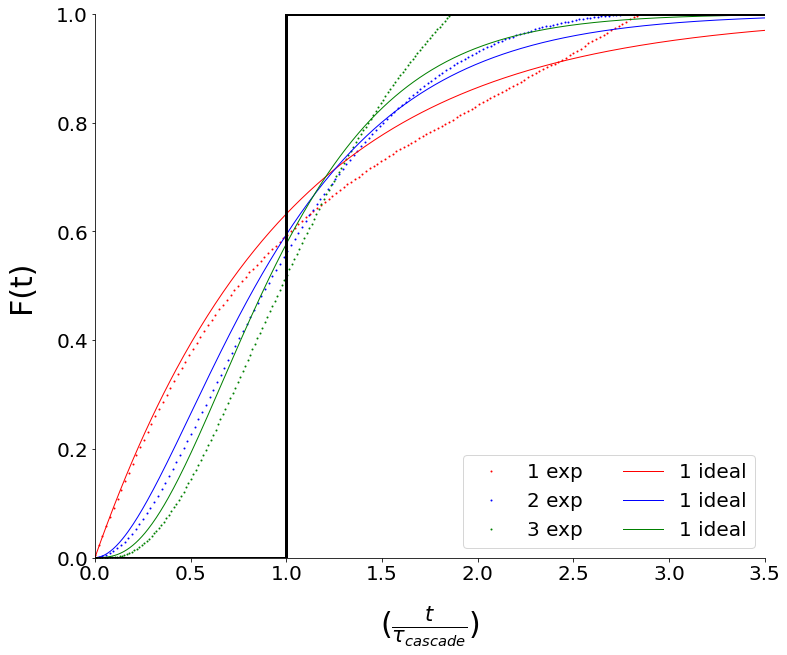

In [655]:
t = np.linspace(0,3000,724)
fig = figure(figsize = (12,10))
n = 5
t300_tau1 = t300/t1_300
t300_tau2 = t300/t2_300
t300_tau3 = t300/t3_300
#markersize = 2
#plt.plot(t_int[::n],batch["ln(A/Ao)"][50:200][::n],'ro', markersize = markersize) #1
markersize = 1
plt.plot(t300_tau1[::n],F1_300_exp[::n],'ro', markersize = markersize, label = "1 exp") #1
plt.plot(t300_tau2[::n],F2_300_exp[::n],'bo',markersize = markersize,label = "2 exp") #2
plt.plot(t300_tau3[::n],F3_300_exp[::n],'go',markersize = markersize,label = "3 exp") #3

linewidth = 1
plt.plot(t/t1_300,F1_300,'r-', linewidth = linewidth, label = "1 ideal")
plt.plot(t/t2_300,F2_300,'b-',linewidth = linewidth, label = "1 ideal")
plt.plot(t/t3_300,F3_300,'g-',linewidth = linewidth, label = "1 ideal")

legend = plt.legend(ncol = 2, loc = 'lower right', fontsize = 20) #
                    #markerfirst = False,labelcolor =('b','g','r','c','m','y'),labelspacing = 0.4
                   #,handlelength =3,handletextpad = 3,columnspacing = 0,bbox_to_anchor = (0.95,0.1),frameon = True,borderpad = 2,borderaxespad = 0.2) #^{Exp}
#k1 =0.002274109
#k2 =0.002799055
#k3 =0.0023565
plt.ylabel(r"F(t)", fontsize = 30,labelpad=20)
plt.xlabel(r"$(\frac{t} {\tau_{cascade}})$",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlim(0,3.5)
plt.ylim(0,1)
#k_avg = 0.0024
#k_err = 1.06 * np.power(1/10,-5)
plt.axhline(y=0, c="black",xmin=0, xmax=0.285,linewidth=3)
plt.axhline(y=1, c="black",xmin=0.285,xmax = 1,linewidth=3)
plt.axvline(x=1, c="black",ymin=0, ymax=1,linewidth=3)
#f1 = np.log(np.exp(-k1*batch["t"][105:255]))
#f2 = np.log(np.exp(-k2*batch["t"][58:208]))
#f3 = np.log(np.exp(-k3*t_int))
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#plt.plot(t_int,f1,'r-', linewidth = 1)
#plt.plot(t_int,f2,'b-',linewidth = 1)
#plt.plot(t_int,f3,'g-',linewidth = 1)


range(0, 40)


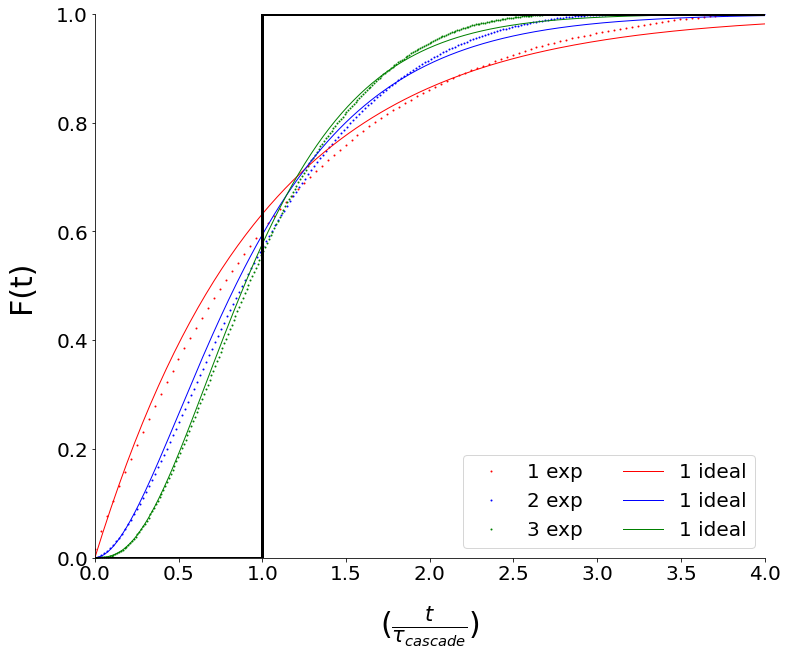

In [654]:
t = np.linspace(0,3000,754)
fig = figure(figsize = (12,10))
n = 3
t500_tau1 = t500/t1_500
t500_tau2 = t500/t2_500
t500_tau3 = t500/t3_500
#markersize = 2
#plt.plot(t_int[::n],batch["ln(A/Ao)"][50:200][::n],'ro', markersize = markersize) #1
markersize = 1
plt.plot(t500_tau1[::n],F1_500_exp[::n],'ro', markersize = markersize, label = "1 exp") #1
plt.plot(t500_tau2[::n],F2_500_exp[::n],'bo',markersize = markersize,label = "2 exp") #2
plt.plot(t500_tau3[::n],F3_500_exp[::n],'go',markersize = markersize,label = "3 exp") #3

linewidth = 1
plt.plot(t/t1_500,F1_500,'r-', linewidth = linewidth, label = "1 ideal")
plt.plot(t/t2_500,F2_500,'b-',linewidth = linewidth, label = "1 ideal")
plt.plot(t/t3_500,F3_500,'g-',linewidth = linewidth, label = "1 ideal")

legend = plt.legend(ncol = 2, loc = 'lower right', fontsize = 20) #
                    #markerfirst = False,labelcolor =('b','g','r','c','m','y'),labelspacing = 0.4
                   #,handlelength =3,handletextpad = 3,columnspacing = 0,bbox_to_anchor = (0.95,0.1),frameon = True,borderpad = 2,borderaxespad = 0.2) #^{Exp}
#k1 =0.002274109
#k2 =0.002799055
#k3 =0.0023565
plt.ylabel(r"F(t)", fontsize = 30,labelpad=20)
plt.xlabel(r"$(\frac{t} {\tau_{cascade}})$",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0,1)
plt.xlim(0,4)
#k_avg = 0.0024
#k_err = 1.06 * np.power(1/10,-5)
plt.axhline(y=0, c="black",xmin=0, xmax=0.25,linewidth=3)
plt.axhline(y=1, c="black",xmin=0.25,xmax = 1,linewidth=3)
plt.axvline(x=1, c="black",ymin=0, ymax=1,linewidth=3)
#f1 = np.log(np.exp(-k1*batch["t"][105:255]))
#f2 = np.log(np.exp(-k2*batch["t"][58:208]))
#f3 = np.log(np.exp(-k3*t_int))
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#plt.plot(t_int,f1,'r-', linewidth = 1)
#plt.plot(t_int,f2,'b-',linewidth = 1)
#plt.plot(t_int,f3,'g-',linewidth = 1)
print(range(0,40))

In [363]:
def func(n,t_tau,n_react):
    return 1/(np.math.factorial(n-1))*np.power(n_react*t_tau,n-1)

In [719]:
t = np.linspace(0,77,78)
n_500 = 83
tau_500 = 54.47
t_tau500 = t/54.47
F_500 = [0]*len(t)

for i in range(len(t)):
    t_tau = t_tau500[i]
    A = 0
    express = 0
    for n in range(1,(n_500+1)):
        A = A+func(n,t_tau,n_500)
    F_500[i] = 1-np.exp(-t_tau*n_500)*(A)



In [720]:
t = np.linspace(0,108,109)
n_300 = 12
tau_300 = 27.72
t_tau300 = t/tau_300
F_300 = [0]*len(t)

for i in range(len(t)):
    t_tau = t_tau300[i]
    A = 0
    express = 0
    for n in range(1,(n_300+1)):
        A = func(n,t_tau,n_300)
        express = express + A
    F_300[i] = 1-np.exp(-n_300*t_tau)*(express)


In [710]:
print(len(t))
PFR_dat = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\PFR_dat.xlsx")

109


In [721]:
PFR_300 = PFR_dat["F_300"]
PFR_500 = PFR_dat["F_500"]
Ptau_300 = PFR_dat["t/tau_300"]
Ptau_500 = PFR_dat["t/tau_500"]

In [729]:
#print(Ptau_300[0:109]-Ptau_500)
print(Ptau_300[10:20])
print(sum(np.power((PFR_300[0:109]- F_300),2)))
print(sum(np.power((PFR_500[0:78]- F_500),2)))
print(PFR_300[10:20],F_300[10:20])

10    0.360566
11    0.396622
12    0.432679
13    0.468736
14    0.504792
15    0.540849
16    0.576905
17    0.612962
18    0.649019
19    0.685075
Name: t/tau_300, dtype: float64
0.03814230132435725
0.09062094672711098
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000765
15    0.004932
16    0.015391
17    0.034269
18    0.062160
19    0.099490
Name: F_300, dtype: float64 [0.00175979913727764, 0.0037528473427325126, 0.007256685916396388, 0.012929082824239657, 0.021492158611566836, 0.03366601881713571, 0.050094922690487764, 0.07127744835186367, 0.09751069954617742, 0.12885547404766384]


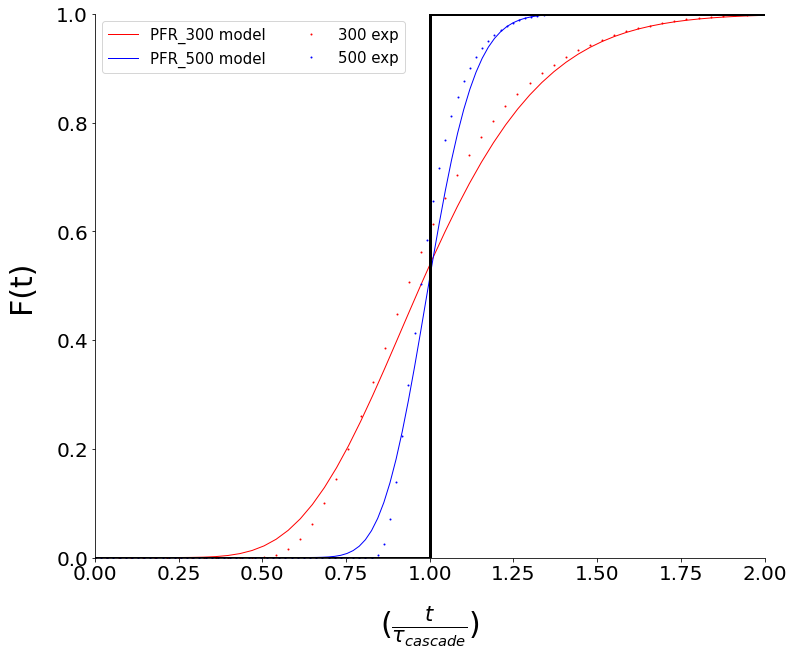

In [625]:
fig = figure(figsize = (12,10))
n = 2
#markersize = 2
#plt.plot(t_int[::n],batch["ln(A/Ao)"][50:200][::n],'ro', markersize = markersize) #1
markersize = 1
plt.plot(t_tau300,F_300,'r-', linewidth = linewidth, label = "PFR_300 model") 
plt.plot(t_tau500,F_500,'b-',linewidth = linewidth,label = "PFR_500 model") 
plt.plot(Ptau_300,PFR_300,'ro',markersize = markersize,label = "300 exp") 
plt.plot(Ptau_500,PFR_500,'bo',markersize = markersize,label = "500 exp") 
plt.ylabel(r"F(t)", fontsize = 30,labelpad=20)
plt.xlabel(r"$(\frac{t} {\tau_{cascade}})$",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0,1)
plt.xlim(0,2)
#k_avg = 0.0024
#k_err = 1.06 * np.power(1/10,-5)
plt.axhline(y=0, c="black",xmin=0, xmax=0.5,linewidth=3)
plt.axhline(y=1, c="black",xmin=0.5,xmax = 1,linewidth=3)
plt.axvline(x=1, c="black",ymin=0, ymax=1,linewidth=3)
legend = plt.legend(ncol = 2, loc = 'upper left', fontsize = 15)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

In [605]:
f_dat = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\all_f_data.xlsx")

In [614]:
#500 data
#           f_low	f_high	f	f_low	f_high	f	f_low	f_high	f	f_low	f_high	f
rxt1 = [0.472712353,0.530654836,0.502662011,0.282898216,0.305207812,0.294229273,0.291316857,0.314646462,0.303164646]
rxt2 = [0.620007867,0.660605247,0.640727524,0.6859992,0.715138101,0.701100541,0.492214395,0.524242425,0.508613484]
rxt3 = [0.472894968,0.553138821,0.51421594,0.914888504,0.929257084,0.922515119,0.659336257,0.692177182,0.676312664]

ms_rxt_500 = [rxt1[2],rxt2[2],rxt3[2]]
CSTR_rxt_500 = [rxt1[5],rxt2[5],rxt3[5]]
segflow_rxt_500 = [rxt1[-1],rxt2[-1],rxt3[-1]]
print(ms_rxt_500, CSTR_rxt_500,segflow_rxt_500)

f_flow = (pd.read_excel(r"C:\Users\buing\Documents\CBE 424\reactor\all_f_data.xlsx")).to_numpy()
#f_low_500 = f_flow["f_low"][0:3]
#f_high_500 = f_flow["f_high"][0:3]
#f_low_300 = f_flow["f_low"][3:6]
#f_high_300 = f_flow["f_high"][3:6]

#f_low_300 = f_flow[1][2]

rxt1_300 = [0.900229883,0.921964223,0.911389937,0.556021447,0.558136287,0.557081391,0.575141443,0.577242095,0.576194481]
rxt2_300 = [0.956953783,0.97203294,0.964758236,0.806952079,0.808801912,0.807880335,0.646889526,0.649445358,0.648170778]
rxt3_300 = [0.650823243,0.704009636,0.678124267,0.959689277,0.960365656,0.960029374,0.797507126,0.799774695,0.798644999]

ms_rxt_300 = [rxt1_300[2],rxt2_300[2],rxt3_300[2]]
CSTR_rxt_300 = [rxt1_300[5],rxt2_300[5],rxt3_300[5]]
segflow_rxt_300 = [rxt1_300[-1],rxt2_300[-1],rxt3_300[-1]]
print(ms_rxt_500, CSTR_rxt_500,segflow_rxt_500)

print(f_flow)

[0.502662011, 0.640727524, 0.51421594] [0.294229273, 0.701100541, 0.922515119] [0.303164646, 0.508613484, 0.676312664]
[0.502662011, 0.640727524, 0.51421594] [0.294229273, 0.701100541, 0.922515119] [0.303164646, 0.508613484, 0.676312664]
[[nan 'measured' nan nan 'PFR model' nan nan 'CSTR model' nan nan
  '3 tank seg' nan nan nan nan 'measured' nan nan 'PFR model' nan nan
  'CSTR model' nan nan '3 tank seg' nan nan]
 [nan 'f_low' 'f_high' 'f' 'f_low' 'f_high' 'f' 'f_low' 'f_high' 'f'
  'f_low' 'f_high' 'f' nan nan 'f_low' 'f_high' 'f' 'f_low' 'f_high' 'f'
  'f_low' 'f_high' 'f' 'f_low' 'f_high' 'f']
 ['reactor 1' 0.9002298833632577 0.9219642232930975 0.9113899374412958
  0.7141708576700594 0.7172356062762733 0.715707361791589
  0.5560214471375886 0.5581362869063422 0.5570813914822557
  0.5751414429959738 0.5772420949120691 0.5761944809543853 nan
  'reactor 1' 0.4727123529962728 0.5306548361444738 0.5026620105335471
  0.33972848368584463 0.34208354132012586 0.3409070643827231
  0.2933382

0.305207812


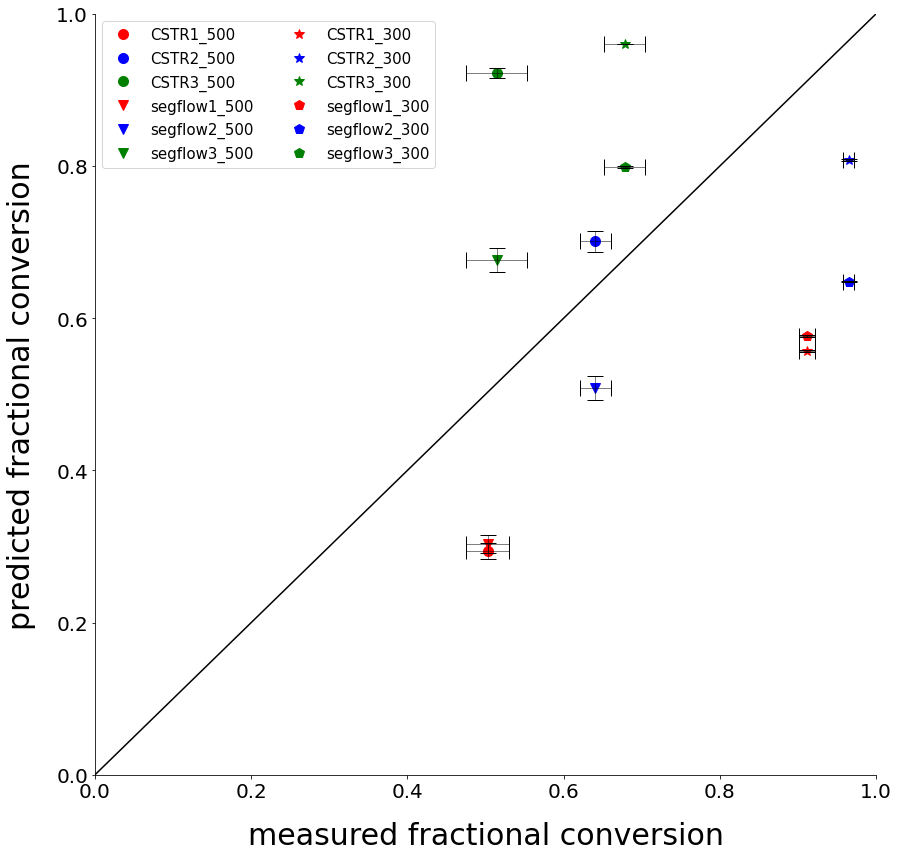

In [658]:
fig = figure(figsize = (14,14))

markersize = 10
#500
plt.plot(rxt1[2],rxt1[5],'ro', markersize = markersize, label = "CSTR1_500") 
plt.plot(rxt2[2],rxt2[5],'bo',markersize = markersize,label = "CSTR2_500") 
plt.plot(rxt3[2],rxt3[5],'go',markersize = markersize,label = "CSTR3_500") 
plt.plot(rxt1[2],rxt1[-1],'rv', markersize = markersize, label = "segflow1_500") 
plt.plot(rxt2[2],rxt2[-1],'bv',markersize = markersize,label = "segflow2_500") 
plt.plot(rxt3[2],rxt3[-1],'gv',markersize = markersize,label = "segflow3_500")

plt.plot(rxt1_300[2],rxt1_300[5],'r*', markersize = markersize, label = "CSTR1_300") 
plt.plot(rxt2_300[2],rxt2_300[5],'b*',markersize = markersize,label = "CSTR2_300") 
plt.plot(rxt3_300[2],rxt3_300[5],'g*',markersize = markersize,label = "CSTR3_300") 
plt.plot(rxt1_300[2],rxt1_300[-1],'rp', markersize = markersize, label = "segflow1_300") 
plt.plot(rxt2_300[2],rxt2_300[-1],'bp',markersize = markersize,label = "segflow2_300") 
plt.plot(rxt3_300[2],rxt3_300[-1],'gp',markersize = markersize,label = "segflow3_300")
plt.plot([0, 1], [0, 1],c="black") 
plt.ylim(0,1)
plt.xlim(0,1)
legend = plt.legend(ncol = 2, loc = 'best', fontsize = 15)
xerr1_CS = [rxt1[1],rxt1[0]]
yerr1_CS = [rxt1[4]-rxt1[3]]
print(rxt1[4])
capsize = 8
elinewidth = 0.5
plt.errorbar(rxt1[2],rxt1[5], xerr=rxt1[2]-rxt1[1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt2[2],rxt2[5], xerr=rxt2[2]-rxt2[1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt3[2],rxt3[5], xerr=rxt3[2]-rxt3[1], fmt='k',capsize = capsize,elinewidth=elinewidth)

plt.errorbar(rxt1[2],rxt1[5], yerr=rxt1[4]-rxt1[5], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt2[2],rxt2[5], yerr=rxt2[4]-rxt2[5], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt3[2],rxt3[5], yerr=rxt3[4]-rxt3[5], fmt='k',capsize = capsize,elinewidth=elinewidth)

plt.errorbar(rxt1[2],rxt1[-1], xerr=rxt1[2]-rxt1[1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt2[2],rxt2[-1], xerr=rxt2[2]-rxt2[1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt3[2],rxt3[-1], xerr=rxt3[2]-rxt3[1], fmt='k',capsize = capsize,elinewidth=elinewidth)

plt.errorbar(rxt1[2],rxt1[-1], yerr=rxt1[-2]-rxt1[-1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt2[2],rxt2[-1], yerr=rxt2[-2]-rxt2[-1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt3[2],rxt3[-1], yerr=rxt3[-2]-rxt3[-1], fmt='k',capsize = capsize,elinewidth=elinewidth)


plt.errorbar(rxt1_300[2],rxt1_300[5], xerr=rxt1_300[2]-rxt1_300[1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt2_300[2],rxt2_300[5], xerr=rxt2_300[2]-rxt2_300[1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt3_300[2],rxt3_300[5], xerr=rxt3_300[2]-rxt3_300[1], fmt='k',capsize = capsize,elinewidth=elinewidth)

plt.errorbar(rxt1_300[2],rxt1_300[5], yerr=rxt1_300[4]-rxt1_300[5], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt2_300[2],rxt2_300[5], yerr=rxt2_300[4]-rxt2_300[5], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt3_300[2],rxt3_300[5], yerr=rxt3_300[4]-rxt3_300[5], fmt='k',capsize = capsize,elinewidth=elinewidth)

plt.errorbar(rxt1_300[2],rxt1_300[-1], xerr=rxt1_300[2]-rxt1_300[1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt2_300[2],rxt2_300[-1], xerr=rxt2_300[2]-rxt2_300[1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt3_300[2],rxt3_300[-1], xerr=rxt3_300[2]-rxt3_300[1], fmt='k',capsize = capsize,elinewidth=elinewidth)

plt.errorbar(rxt1_300[2],rxt1_300[-1], yerr=rxt1_300[-2]-rxt1_300[-1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt2_300[2],rxt2_300[-1], yerr=rxt2_300[-2]-rxt2_300[-1], fmt='k',capsize = capsize,elinewidth=elinewidth)
plt.errorbar(rxt3_300[2],rxt3_300[-1], yerr=rxt3_300[-2]-rxt3_300[-1], fmt='k',capsize = capsize,elinewidth=elinewidth)

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.ylabel(r"predicted fractional conversion", fontsize = 30,labelpad=20)
plt.xlabel(r"measured fractional conversion",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
#plt.plot(Ptau_300,PFR_300,'ro',markersize = markersize,label = "300 exp") 
#plt.plot(Ptau_500,PFR_500,'bo',markersize = markersize,label = "500 exp") 